In [3]:
import pandas as pd

df1 = pd.read_csv('../output_1_10000.csv')
df2 = pd.read_csv('../output_10001_20000.csv')
df3 = pd.read_csv('../output_20001_30000.csv')
df4 = pd.read_csv('../output_30001_40000.csv')
df5 = pd.read_csv('../output_40001_50000.csv')
df6 = pd.read_csv('../output_50001_59542.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6])
df.head()

,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords
0,"tag:reuters.com,2019:newsml_A4N21U01K:14029350...",2019-09-04T06:15:57.000Z,"tag:reuters.com,2019:newsml_A4N21U01K",TURKEY-CURRENCY/ (URGENT),"Turkey's lira firms on inflation data, Fed and...",TURKEY-CURRENCY/ (URGENT):Turkey's lira firms ...,{'Market Reports'},"{'Europe', 'Turkey', 'Asia', 'South-Eastern Eu...",939,758,110
1,"tag:reuters.com,2019:newsml_A4N21U01U:17226675...",2019-09-16T15:56:20.000Z,"tag:reuters.com,2019:newsml_A4N21U01U",SYRIA-SECURITY/SUMMIT-ERDOGAN (URGENT),"Turkey, Russia, Iran must take more responsibi...","SYRIA-SECURITY/SUMMIT-ERDOGAN (URGENT):Turkey,...",NaN,"{'United States', 'Americas', 'South-West Asia...",1052,868,126
2,"tag:reuters.com,2019:newsml_A4N21U01Y:16426876...",2019-09-04T11:08:11.000Z,"tag:reuters.com,2019:newsml_A4N21U01Y",TURKEY-ECONOMY/BANKS (URGENT),Turkish banking sector NPL ratio rises to 4.47...,TURKEY-ECONOMY/BANKS (URGENT):Turkish banking ...,NaN,"{'Europe', 'Turkey', 'Asia', 'South-Eastern Eu...",880,711,111
3,"tag:reuters.com,2019:newsml_A4N21U01Z:34605233...",2019-09-12T14:59:13.000Z,"tag:reuters.com,2019:newsml_A4N21U01Z",TURKEY-ECONOMY/GDP (URGENT),Turkish economy will post positive annual grow...,TURKEY-ECONOMY/GDP (URGENT):Turkish economy wi...,{'Market Reports'},"{'Western Europe', 'Europe', 'Turkey', 'Asia',...",920,754,108
4,"tag:reuters.com,2019:newsml_A4N21U020:14323789...",2019-09-17T14:14:42.000Z,"tag:reuters.com,2019:newsml_A4N21U020",TURKEY-CURRENCY/OIL (URGENT),Turkey's lira firms after report of Saudi oil ...,TURKEY-CURRENCY/OIL (URGENT):Turkey's lira fir...,{'Market Reports'},"{'North America', 'Europe', 'Turkey', 'United ...",2313,1897,293


In [4]:
df.to_csv("reuters.csv.gz", 
           index=False, 
           compression="gzip")

In [5]:
df['avgWordLength'] = df['bodyLengthCharsNonWhitespace'] / df['bodyLengthWords']
df.describe()
# rough estimates about the text body:
#  - text body tends to be about 595 words long, but with extreme outliers (46297!)
#  - text body tends to be about 2904 chars long, but with extreme outliers (203K!)
#  - average word length is 7-8 chars long (bodyLengthCharsNonWhitespace / bodyLengthWords, for mean and max)

,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength
count,59542.000000,59542.000000,59542.000000,59542.000000
mean,2759.126751,2201.525914,326.525864,7.591569
std,7472.396196,6149.590782,960.275222,1.380466
min,0.000000,0.000000,1.000000,0.000000
25%,482.000000,380.000000,44.000000,6.644231
50%,959.000000,761.000000,106.000000,7.201647
75%,2952.000000,2346.000000,356.000000,8.450000
max,294233.000000,251216.000000,42360.000000,43.578125


In [6]:
pd.set_option('display.max_colwidth', 0)
df[df['bodyLengthChars'] > 290000]


,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength
3669,"tag:reuters.com,2019:newsml_CqtYP8GSa:1548902168.XML",2019-09-05T18:59:38.000Z,"tag:reuters.com,2019:newsml_CqtYP8GSa",USCC-CHINA-2019-REVIEW sked,USCC-CHINA-2019-REVIEW sked,USCC-CHINA-2019-REVIEW sked:USCC-CHINA-2019-REVIEW sked,NaN,"{'North America', 'United States', 'Americas'}",294233,251216,42360,5.9305


In [7]:
df.info()
# rough observations:
#  - genres are missing for the majority of items (could disregard genre, or this could be an interesting problem: predict genre items where it's missing)
#  - subjects are missing for only a small number of items, about 6.7% (59542 - 55559)/59542

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59542 entries, 0 to 9541
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   filename                      59542 non-null  object 
 1   datetime                      59542 non-null  object 
 2   guid                          59542 non-null  object 
 3   slugline                      59542 non-null  object 
 4   headline                      59542 non-null  object 
 5   description                   59542 non-null  object 
 6   genres                        15746 non-null  object 
 7   subjects                      55559 non-null  object 
 8   bodyLengthChars               59542 non-null  int64  
 9   bodyLengthCharsNonWhitespace  59542 non-null  int64  
 10  bodyLengthWords               59542 non-null  int64  
 11  avgWordLength                 59542 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 5.9+ MB


In [8]:
# df[df['guid'].str.contains("ASC0ABL4")]
df[df['subjects'].isnull()].describe()

,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength
count,3983.000000,3983.000000,3983.000000,3983.000000
mean,6301.561386,5162.674366,720.443133,7.448218
std,9320.121672,7711.865194,991.416586,1.604207
min,70.000000,58.000000,4.000000,2.460055
25%,1139.000000,911.000000,107.000000,6.541509
50%,3160.000000,2582.000000,373.000000,6.928105
75%,6179.000000,5111.000000,769.500000,7.810010
max,127180.000000,105508.000000,12315.000000,26.421053


In [9]:
all_subjects = set()
subject_set_list = []
for subject_set in df['subjects'].to_numpy():
    if isinstance(subject_set, str) and subject_set != 'EXCEPTION':
        item_subjects = eval(subject_set)
        all_subjects = all_subjects.union(item_subjects)
        subject_set_list.append(item_subjects)
    else:
        subject_set_list.append(set())

In [10]:
all_subjects

{'ASEAN Countries',
 'Afghanistan',
 'Africa',
 'Alabama',
 'Alaska',
 'Albania',
 'Algeria',
 'Alpine Skiing',
 'American Football',
 'American Samoa',
 'Americas',
 'Andorra',
 'Angling',
 'Angola',
 'Anguilla',
 'Antarctic',
 'Antarctica',
 'Antigua and Barbuda',
 'Aquatic Sports',
 'Archery',
 'Argentina',
 'Arizona',
 'Arkansas',
 'Armenia',
 'Art',
 'Arts / Culture / Entertainment',
 'Aruba',
 'Asia',
 'Asia / Pacific',
 'Athletics',
 'Australia',
 'Australia / New Zealand',
 'Australian Rules Football',
 'Austria',
 'Azerbaijan',
 'BULLETIN',
 'Badminton',
 'Bahamas',
 'Bahrain',
 'Baltic States',
 'Bangladesh',
 'Barbados',
 'Baseball',
 'Basketball',
 'Belarus',
 'Belgium',
 'Belize',
 'Benelux',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boating / Sailing',
 'Bobsleigh',
 'Bolivia',
 'Books',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bowls',
 'Boxing',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS C

In [32]:
print("Total number of subjects:", len(all_subjects))
df['subjects'] = subject_set_list
df.head()

Total number of subjects: 414


,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength,subject Minnesota,subject Australian Rules Football,subject Wrestling,subject Southern France,subject Mali,subject New Mexico,subject Fencing,subject Euro Zone,subject Netherlands,subject Tanzania,subject Indo-China,subject Brunei,subject Uruguay,subject Saint Kitts and Nevis,subject Antigua and Barbuda,subject Bulgaria,subject Karate,subject Arts / Culture / Entertainment,subject Jai Alai / Pelota,subject England,subject Power Boating,subject Caribbean,subject Nigeria,subject British Indian Ocean Territory,subject Namibia,subject Kazakhstan,subject Sri Lanka,subject West Virginia,subject Moldova,subject New Jersey,subject East European Countries,subject Nordic States,subject Wisconsin,subject Tuvalu,subject New Caledonia,subject Guyana,subject Softball,subject Liberia,subject Northern Ireland,subject Iran,subject Idaho,subject Bahrain,subject Shooting,subject East Africa,subject Energy Region Middle East,subject Motorcycle Racing,subject Poland,subject Maldives,subject Tajikistan,subject Seychelles,subject Scandinavia,subject Trinidad and Tobago,subject Ecuador,subject Table Tennis,"subject Saint Helena, Ascension and Tristan da Cunha",subject Mongolia,subject Saint Lucia,subject Singapore,subject Hawaii,subject Triathlon,subject Emerging Market Countries,subject Rugby Union,subject NBA Basketball,subject Rugby League,subject New York City,subject Gulf,subject Western Europe,subject Doping / Drugs Tests,subject Bhutan,subject Peru,subject Indiana,subject Cambodia,subject Swimming,subject Euro Zone as a Whole,subject Sweden,subject Ivory Coast,subject Arizona,subject NHL Ice Hockey,subject Bahamas,subject Guinea,subject Ethiopia,subject Fashion,subject Sao Tome and Principe,subject Equatorial Guinea,subject Serbia,subject Benin,subject Kentucky,subject Wales,subject Armenia,subject Dominican Republic,subject Boating / Sailing,subject Micronesia,subject Arkansas,subject Oklahoma,subject Cayman Islands,subject South-Eastern Europe,subject China (PRC),subject Denmark,subject Burundi,subject Indonesia,subject Turks and Caicos Islands,subject Vatican City,subject Romania,subject Diving,subject Malta,subject Kansas,subject Formula 1,subject Laos,subject South Sudan,subject Samoa,subject Energy Region Europe / Middle East / Africa,subject Israel,subject French Guiana,subject Energy Region Former Soviet Union,subject Cyprus,subject Egypt,subject United States,subject Uganda,subject Cricket,subject Alabama,subject North Africa,subject Pool,subject Ohio,subject Aruba,subject Barbados,subject Zambia,subject Energy Region Other Africa,subject Guadeloupe,subject Kenya,subject California,subject Germany,subject Wyoming,subject British Virgin Islands,subject Mexico,subject Croatia,subject Energy Region Mediterranean / North Africa,subject East Asia,subject Norway,subject Human Interest / Brights / Odd News,subject Motor Racing,subject Snooker,subject South-West Asia,subject Paraguay,subject Congo (RC),subject Fiji,subject Cameroon,subject North Dakota,subject Colombia,subject Solomon Islands,subject Southern Africa,subject Gabon,subject Washington,subject Niger,subject Horse Racing,subject Madagascar,subject Chile,subject Kyrgyzstan,subject Brazil,subject Television,subject Spain,subject Angola,subject Panama,subject Americas,subject Europe,subject Benelux,subject Music,subject Bolivia,subject NFL American Football,subject Maryland,subject Montana,subject Energy Region Caribbean / Central America,subject Grenada,subject Tonga,subject Yemen,subject Lesotho,subject San Marino,subject South America,subject Palau,subject United Arab Emirates,subject Central / Eastern Europe,subject Costa Rica,subject Russia,subject Florida,subject Nepal,subject Italy,subject Morocco,subject Weightlifting,subject Nicaragua,subject Monaco,subject Central Asia,subject Illinois,subject Louisiana,subject Uzbekistan,subject V

In [33]:
# build a dictionary with a key/value entry for each subject, where value is a list of True/False
# based on whether each row's subject set contains the subject
subjects_dict = {}
# for index, row in df.iterrows():
for row in df.itertuples():
    for subject in all_subjects:
        match = subject in row.subjects
        if subject in subjects_dict:
            subjects_dict[subject].append(match)
        else:
            subjects_dict[subject] = [match]


In [34]:
for subject in all_subjects:
    df['subject ' + subject] = subjects_dict[subject]

In [35]:
pd.options.display.max_rows = 4000
pd.set_option('max_columns', 500)
df.head()

,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength,subject Minnesota,subject Australian Rules Football,subject Wrestling,subject Southern France,subject Mali,subject New Mexico,subject Fencing,subject Euro Zone,subject Netherlands,subject Tanzania,subject Indo-China,subject Brunei,subject Uruguay,subject Saint Kitts and Nevis,subject Antigua and Barbuda,subject Bulgaria,subject Karate,subject Arts / Culture / Entertainment,subject Jai Alai / Pelota,subject England,subject Power Boating,subject Caribbean,subject Nigeria,subject British Indian Ocean Territory,subject Namibia,subject Kazakhstan,subject Sri Lanka,subject West Virginia,subject Moldova,subject New Jersey,subject East European Countries,subject Nordic States,subject Wisconsin,subject Tuvalu,subject New Caledonia,subject Guyana,subject Softball,subject Liberia,subject Northern Ireland,subject Iran,subject Idaho,subject Bahrain,subject Shooting,subject East Africa,subject Energy Region Middle East,subject Motorcycle Racing,subject Poland,subject Maldives,subject Tajikistan,subject Seychelles,subject Scandinavia,subject Trinidad and Tobago,subject Ecuador,subject Table Tennis,"subject Saint Helena, Ascension and Tristan da Cunha",subject Mongolia,subject Saint Lucia,subject Singapore,subject Hawaii,subject Triathlon,subject Emerging Market Countries,subject Rugby Union,subject NBA Basketball,subject Rugby League,subject New York City,subject Gulf,subject Western Europe,subject Doping / Drugs Tests,subject Bhutan,subject Peru,subject Indiana,subject Cambodia,subject Swimming,subject Euro Zone as a Whole,subject Sweden,subject Ivory Coast,subject Arizona,subject NHL Ice Hockey,subject Bahamas,subject Guinea,subject Ethiopia,subject Fashion,subject Sao Tome and Principe,subject Equatorial Guinea,subject Serbia,subject Benin,subject Kentucky,subject Wales,subject Armenia,subject Dominican Republic,subject Boating / Sailing,subject Micronesia,subject Arkansas,subject Oklahoma,subject Cayman Islands,subject South-Eastern Europe,subject China (PRC),subject Denmark,subject Burundi,subject Indonesia,subject Turks and Caicos Islands,subject Vatican City,subject Romania,subject Diving,subject Malta,subject Kansas,subject Formula 1,subject Laos,subject South Sudan,subject Samoa,subject Energy Region Europe / Middle East / Africa,subject Israel,subject French Guiana,subject Energy Region Former Soviet Union,subject Cyprus,subject Egypt,subject United States,subject Uganda,subject Cricket,subject Alabama,subject North Africa,subject Pool,subject Ohio,subject Aruba,subject Barbados,subject Zambia,subject Energy Region Other Africa,subject Guadeloupe,subject Kenya,subject California,subject Germany,subject Wyoming,subject British Virgin Islands,subject Mexico,subject Croatia,subject Energy Region Mediterranean / North Africa,subject East Asia,subject Norway,subject Human Interest / Brights / Odd News,subject Motor Racing,subject Snooker,subject South-West Asia,subject Paraguay,subject Congo (RC),subject Fiji,subject Cameroon,subject North Dakota,subject Colombia,subject Solomon Islands,subject Southern Africa,subject Gabon,subject Washington,subject Niger,subject Horse Racing,subject Madagascar,subject Chile,subject Kyrgyzstan,subject Brazil,subject Television,subject Spain,subject Angola,subject Panama,subject Americas,subject Europe,subject Benelux,subject Music,subject Bolivia,subject NFL American Football,subject Maryland,subject Montana,subject Energy Region Caribbean / Central America,subject Grenada,subject Tonga,subject Yemen,subject Lesotho,subject San Marino,subject South America,subject Palau,subject United Arab Emirates,subject Central / Eastern Europe,subject Costa Rica,subject Russia,subject Florida,subject Nepal,subject Italy,subject Morocco,subject Weightlifting,subject Nicaragua,subject Monaco,subject Central Asia,subject Illinois,subject Louisiana,subject Uzbekistan,subject V

In [36]:
subjects_count = {}
for subject in all_subjects:
    subjects_count[subject] = len(list(filter(lambda x: x == True, subjects_dict[subject])))

In [37]:
subjects_count = dict(sorted(subjects_count.items(), key=lambda item: item[1], reverse=True))
subjects_count

{'Americas': 27237,
 'North America': 25832,
 'Europe': 25469,
 'United States': 24452,
 'Emerging Market Countries': 23808,
 'Asia / Pacific': 23038,
 'Western Europe': 21220,
 'Asia': 19933,
 'Euro Zone': 12889,
 'United Kingdom': 11347,
 'East Asia': 10914,
 'Central / Eastern Europe': 9527,
 'China (PRC)': 7702,
 'Middle East': 5897,
 'BULLETIN': 5436,
 'South-West Asia': 5202,
 'Germany': 5032,
 'France': 4472,
 'Australia / New Zealand': 4127,
 'Gulf': 3890,
 'Africa': 3778,
 'Australia': 3770,
 'Japan': 3720,
 'Hong Kong': 3629,
 'South America / Central America': 3385,
 'East European Countries': 3095,
 'Nordic States': 2994,
 'Sport': 2980,
 'South Asia': 2958,
 'ASEAN Countries': 2953,
 'South-East Asia': 2943,
 'CIS Countries': 2631,
 'Canada': 2629,
 'Scandinavia': 2530,
 'Ireland': 2519,
 'North Asia': 2493,
 'Russia': 2459,
 'Italy': 2457,
 'India': 2431,
 'Saudi Arabia': 2228,
 'South-Eastern Europe': 2168,
 'South America': 2132,
 'Iran': 1905,
 'Benelux': 1891,
 'Spain

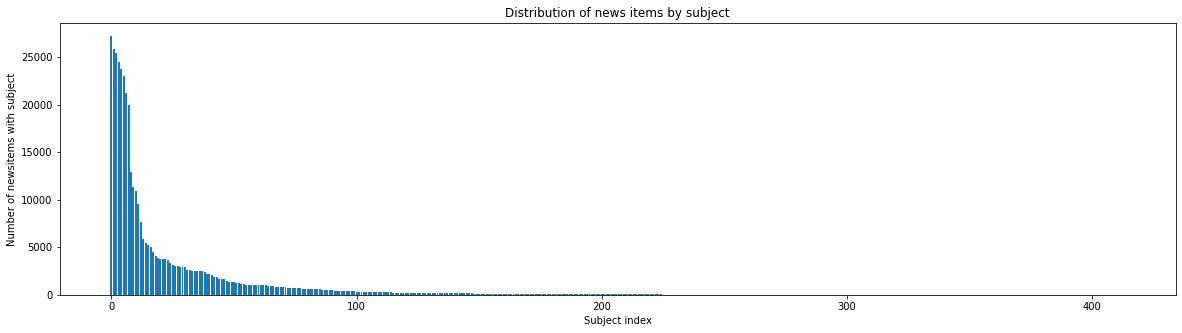

In [88]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
plt.bar(range(len(subjects_count)), list(subjects_count.values()), align='center')
plt.ylabel("Number of newsitems with subject")
plt.xlabel("Subject index")
plt.title ('Distribution of news items by subject')
fig.savefig('distribution_news_item_subject.png', dpi=300, format='png', bbox_inches='tight')

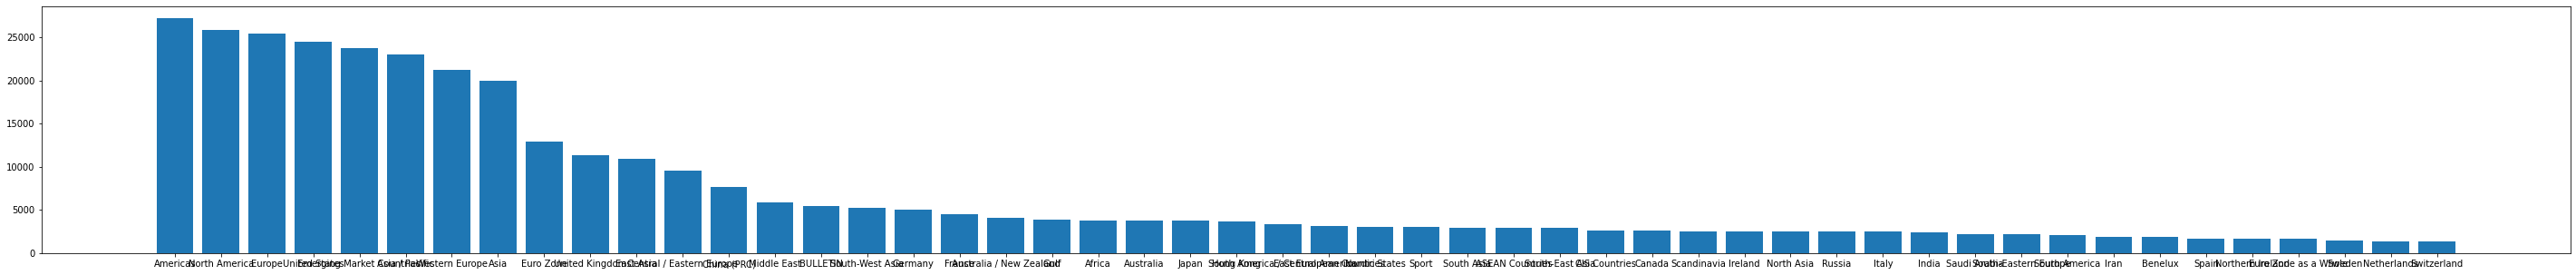

dict_keys(['Americas', 'North America', 'Europe', 'United States', 'Emerging Market Countries', 'Asia / Pacific', 'Western Europe', 'Asia', 'Euro Zone', 'United Kingdom', 'East Asia', 'Central / Eastern Europe', 'China (PRC)', 'Middle East', 'BULLETIN', 'South-West Asia', 'Germany', 'France', 'Australia / New Zealand', 'Gulf', 'Africa', 'Australia', 'Japan', 'Hong Kong', 'South America / Central America', 'East European Countries', 'Nordic States', 'Sport', 'South Asia', 'ASEAN Countries', 'South-East Asia', 'CIS Countries', 'Canada', 'Scandinavia', 'Ireland', 'North Asia', 'Russia', 'Italy', 'India', 'Saudi Arabia', 'South-Eastern Europe', 'South America', 'Iran', 'Benelux', 'Spain', 'Northern Ireland', 'Euro Zone as a Whole', 'Sweden', 'Netherlands', 'Switzerland'])

In [39]:
top_50_subjects_count = dict(filter(lambda x: x[1] >= 1331, subjects_count.items()))

plt.figure(figsize=(50, 5))
plt.bar(range(len(top_50_subjects_count)), list(top_50_subjects_count.values()), align='center')
plt.xticks(range(len(top_50_subjects_count)), list(top_50_subjects_count.keys()))
plt.show()

top_50_subjects_count.keys()

In [40]:
all_genres = set()
genre_set_list = []
for genre_set in df['genres'].to_numpy():
    if isinstance(genre_set, str) and genre_set != 'EXCEPTION':
        item_genres = eval(genre_set)
        all_genres = all_genres.union(item_genres)
        genre_set_list.append(item_genres)
    else:
        genre_set_list.append(set())
all_genres

{'"Results, Listings and Statistics (Sports)"',
 'Advisories',
 'Analyses/Viewpoints',
 'China Exclusive News',
 'Columns',
 'Context',
 'Dealtalk',
 'Diaries',
 'Editorial Specials',
 'Enterprise reporting',
 'Factbox',
 'Features',
 'Highlight',
 'Indicates that the story contains video content',
 'Insights',
 'Instant Views',
 'Interviews',
 'Market Reports',
 'Media type Audio',
 'Media type Graphics',
 'Media type PDF',
 'Media type Pictures',
 'Media type Video',
 'News Releases',
 'Newsmaker',
 'Obituaries',
 'Olympics-Events Timetables',
 'Polls',
 'Press Digests',
 'Previews',
 'Reports',
 'Reuters Breakingviews',
 'Reuters Breakingviews Full',
 'Reuters Poll',
 'Reuters Top News',
 'Schedule',
 'Special Reports',
 'Take a look',
 'Technical Analyses',
 'Texts',
 'Timeline',
 'Wrapup'}

In [43]:
print("Total number of genres:", len(all_genres))
df['genres'] = genre_set_list
df.head()

Total number of genres: 42


,filename,datetime,guid,slugline,headline,description,genres,subjects,bodyLengthChars,bodyLengthCharsNonWhitespace,bodyLengthWords,avgWordLength,subject Minnesota,subject Australian Rules Football,subject Wrestling,subject Southern France,subject Mali,subject New Mexico,subject Fencing,subject Euro Zone,subject Netherlands,subject Tanzania,subject Indo-China,subject Brunei,subject Uruguay,subject Saint Kitts and Nevis,subject Antigua and Barbuda,subject Bulgaria,subject Karate,subject Arts / Culture / Entertainment,subject Jai Alai / Pelota,subject England,subject Power Boating,subject Caribbean,subject Nigeria,subject British Indian Ocean Territory,subject Namibia,subject Kazakhstan,subject Sri Lanka,subject West Virginia,subject Moldova,subject New Jersey,subject East European Countries,subject Nordic States,subject Wisconsin,subject Tuvalu,subject New Caledonia,subject Guyana,subject Softball,subject Liberia,subject Northern Ireland,subject Iran,subject Idaho,subject Bahrain,subject Shooting,subject East Africa,subject Energy Region Middle East,subject Motorcycle Racing,subject Poland,subject Maldives,subject Tajikistan,subject Seychelles,subject Scandinavia,subject Trinidad and Tobago,subject Ecuador,subject Table Tennis,"subject Saint Helena, Ascension and Tristan da Cunha",subject Mongolia,subject Saint Lucia,subject Singapore,subject Hawaii,subject Triathlon,subject Emerging Market Countries,subject Rugby Union,subject NBA Basketball,subject Rugby League,subject New York City,subject Gulf,subject Western Europe,subject Doping / Drugs Tests,subject Bhutan,subject Peru,subject Indiana,subject Cambodia,subject Swimming,subject Euro Zone as a Whole,subject Sweden,subject Ivory Coast,subject Arizona,subject NHL Ice Hockey,subject Bahamas,subject Guinea,subject Ethiopia,subject Fashion,subject Sao Tome and Principe,subject Equatorial Guinea,subject Serbia,subject Benin,subject Kentucky,subject Wales,subject Armenia,subject Dominican Republic,subject Boating / Sailing,subject Micronesia,subject Arkansas,subject Oklahoma,subject Cayman Islands,subject South-Eastern Europe,subject China (PRC),subject Denmark,subject Burundi,subject Indonesia,subject Turks and Caicos Islands,subject Vatican City,subject Romania,subject Diving,subject Malta,subject Kansas,subject Formula 1,subject Laos,subject South Sudan,subject Samoa,subject Energy Region Europe / Middle East / Africa,subject Israel,subject French Guiana,subject Energy Region Former Soviet Union,subject Cyprus,subject Egypt,subject United States,subject Uganda,subject Cricket,subject Alabama,subject North Africa,subject Pool,subject Ohio,subject Aruba,subject Barbados,subject Zambia,subject Energy Region Other Africa,subject Guadeloupe,subject Kenya,subject California,subject Germany,subject Wyoming,subject British Virgin Islands,subject Mexico,subject Croatia,subject Energy Region Mediterranean / North Africa,subject East Asia,subject Norway,subject Human Interest / Brights / Odd News,subject Motor Racing,subject Snooker,subject South-West Asia,subject Paraguay,subject Congo (RC),subject Fiji,subject Cameroon,subject North Dakota,subject Colombia,subject Solomon Islands,subject Southern Africa,subject Gabon,subject Washington,subject Niger,subject Horse Racing,subject Madagascar,subject Chile,subject Kyrgyzstan,subject Brazil,subject Television,subject Spain,subject Angola,subject Panama,subject Americas,subject Europe,subject Benelux,subject Music,subject Bolivia,subject NFL American Football,subject Maryland,subject Montana,subject Energy Region Caribbean / Central America,subject Grenada,subject Tonga,subject Yemen,subject Lesotho,subject San Marino,subject South America,subject Palau,subject United Arab Emirates,subject Central / Eastern Europe,subject Costa Rica,subject Russia,subject Florida,subject Nepal,subject Italy,subject Morocco,subject Weightlifting,subject Nicaragua,subject Monaco,subject Central Asia,subject Illinois,subject Louisiana,subject Uzbekistan,subject V

In [44]:
# build a dictionary with a key/value entry for each genre, where value is a list of True/False
# based on whether each row's genre set contains the genre
genres_dict = {}
# for index, row in df.iterrows():
for row in df.itertuples():
    for genre in all_genres:
        match = genre in row.genres
        if genre in genres_dict:
            genres_dict[genre].append(match)
        else:
            genres_dict[genre] = [match]

In [45]:
for genre in all_genres:
    df['genre ' + genre] = genres_dict[genre]

In [46]:
# https://www.reuters.com/breakingviews
cols = ['filename', 'datetime',  'guid',  'slugline',  'headline',  'description', 'genres', 'subjects', 'bodyLengthChars', 'bodyLengthCharsNonWhitespace', 'bodyLengthWords']
df_breaking_views = df[df['genre Reuters Breakingviews']][cols]

df_breaking_views.to_csv("breakingviews.csv", 
                         index=False)

In [47]:
bv_subs = set()
for sub in df_breaking_views['subjects'].to_numpy():
    bv_subs = bv_subs.union(sub)
len(bv_subs)

85

In [48]:
bv_genres = set()
for genre in df_breaking_views['genres'].to_numpy():
    bv_genres = bv_genres.union(genre)
bv_genres
# df_breaking_views['genres'].to_numpy()

{'Columns',
 'Dealtalk',
 'Enterprise reporting',
 'Media type Graphics',
 'Reports',
 'Reuters Breakingviews',
 'Reuters Breakingviews Full'}

In [56]:
genres_count = {}
for genre in all_genres:
    genres_count[genre] = len(list(filter(lambda x: x == True, genres_dict[genre])))
genres_count

{'Media type Pictures': 3751,
 'Reuters Top News': 10,
 'Reuters Breakingviews Full': 114,
 'Technical Analyses': 1550,
 'Dealtalk': 55,
 'Media type Video': 1452,
 'Reuters Poll': 222,
 'Features': 104,
 'Take a look': 44,
 'China Exclusive News': 1,
 'Timeline': 22,
 'Reports': 6994,
 'Insights': 58,
 'Media type Graphics': 1168,
 'Previews': 1090,
 'Analyses/Viewpoints': 265,
 'Advisories': 97,
 'Highlight': 18,
 'Enterprise reporting': 640,
 'Interviews': 235,
 'Context': 4,
 'Obituaries': 33,
 'Special Reports': 13,
 'Instant Views': 28,
 'Press Digests': 941,
 'Columns': 721,
 'Polls': 287,
 'Indicates that the story contains video content': 173,
 'Wrapup': 2,
 'Market Reports': 3899,
 'Editorial Specials': 4,
 'Texts': 22,
 'Newsmaker': 19,
 'Factbox': 308,
 'News Releases': 271,
 'Diaries': 393,
 'Reuters Breakingviews': 216,
 '"Results, Listings and Statistics (Sports)"': 16,
 'Media type PDF': 237,
 'Media type Audio': 2,
 'Schedule': 233,
 'Olympics-Events Timetables': 1}

In [57]:
genres_count = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse=True))
genres_count

{'Reports': 6994,
 'Market Reports': 3899,
 'Media type Pictures': 3751,
 'Technical Analyses': 1550,
 'Media type Video': 1452,
 'Media type Graphics': 1168,
 'Previews': 1090,
 'Press Digests': 941,
 'Columns': 721,
 'Enterprise reporting': 640,
 'Diaries': 393,
 'Factbox': 308,
 'Polls': 287,
 'News Releases': 271,
 'Analyses/Viewpoints': 265,
 'Media type PDF': 237,
 'Interviews': 235,
 'Schedule': 233,
 'Reuters Poll': 222,
 'Reuters Breakingviews': 216,
 'Indicates that the story contains video content': 173,
 'Reuters Breakingviews Full': 114,
 'Features': 104,
 'Advisories': 97,
 'Insights': 58,
 'Dealtalk': 55,
 'Take a look': 44,
 'Obituaries': 33,
 'Instant Views': 28,
 'Timeline': 22,
 'Texts': 22,
 'Newsmaker': 19,
 'Highlight': 18,
 '"Results, Listings and Statistics (Sports)"': 16,
 'Special Reports': 13,
 'Reuters Top News': 10,
 'Context': 4,
 'Editorial Specials': 4,
 'Wrapup': 2,
 'Media type Audio': 2,
 'China Exclusive News': 1,
 'Olympics-Events Timetables': 1}

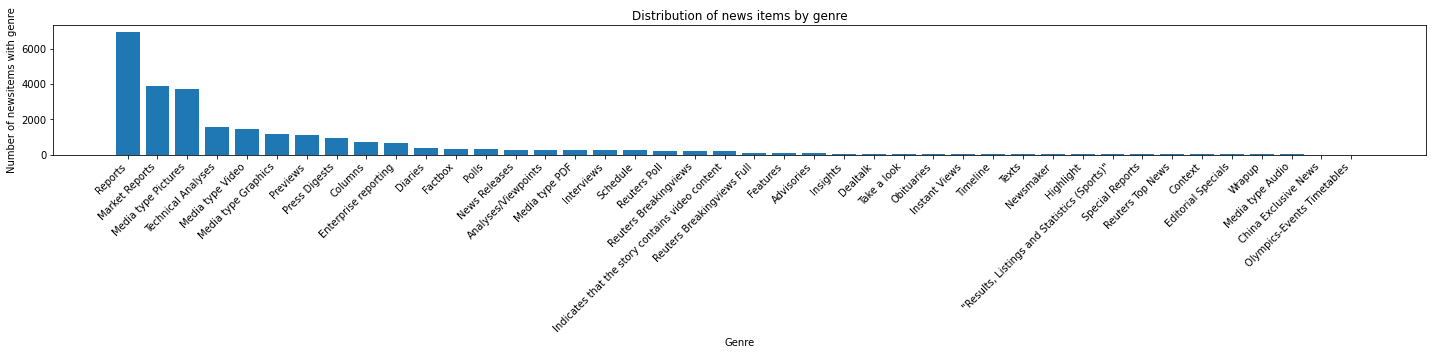

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()
plt.bar(range(len(genres_count)), list(genres_count.values()), align='center')
xticks = plt.xticks(range(len(genres_count)), list(genres_count.keys()))
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.ylabel("Number of newsitems with genre")
plt.xlabel("Genre")
plt.title ('Distribution of news items by genre')
plt.tight_layout()
fig.savefig('distribution_news_item_genre.png', dpi=300, format='png', bbox_inches='tight')

In [3]:
import pandas as pd

# import the text body from "output_text_body_..." files
df_tb1 = pd.read_csv('../output_text_body_1_10000.csv')
df_tb2 = pd.read_csv('../output_text_body_10001_20000.csv')
df_tb3 = pd.read_csv('../output_text_body_20001_30000.csv')
df_tb4 = pd.read_csv('../output_text_body_30001_40000.csv')
df_tb5 = pd.read_csv('../output_text_body_40001_50000.csv')
df_tb6 = pd.read_csv('../output_text_body_50001_59542.csv')

df_tb = pd.concat([df_tb1, df_tb2, df_tb3, df_tb4, df_tb5, df_tb6])
df_tb.head()

,guid,body
0,"tag:reuters.com,2019:newsml_A4N21U01K","<html:p>ANKARA, Sept 4 (Reuters) - Turkey\'s l..."
1,"tag:reuters.com,2019:newsml_A4N21U01U","<html:p>ANKARA, Sept 16 (Reuters) - Turkey, Ru..."
2,"tag:reuters.com,2019:newsml_A4N21U01Y","<html:p>ANKARA, Sept 4 (Reuters) - The ratio o..."
3,"tag:reuters.com,2019:newsml_A4N21U01Z","<html:p>ISTANBUL, Sept 12 (Reuters) - Turkish ..."
4,"tag:reuters.com,2019:newsml_A4N21U020","<html:p>ANKARA, Sept 17 (Reuters) - Turkey\'s ..."


In [4]:
df_tb.to_csv("guid_to_text_body.csv.gz",
             index=False,
             compression="gzip")